In [1]:
##Importing neccessary libraries
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
#Create a connection
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [4]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [5]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

We can see there are some objects in the dataset.

Also non-necessary features in the dataset

In [8]:
df.describe(include='all')

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183978,183142.000000,183142.000000,183142,180748,183142,183142.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
unique,NaN,NaN,NaN,197,NaN,NaN,2,8,19,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,2007-02-22 00:00:00,NaN,NaN,right,medium,medium,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,11794,NaN,NaN,138409,125070,130846,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,91989.50000,165671.524291,135900.617324,NaN,68.600015,73.460353,NaN,NaN,NaN,55.086883,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,NaN,7.041139,6.592271,NaN,NaN,NaN,17.242135,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,NaN,33.000000,39.000000,NaN,NaN,NaN,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,NaN,64.000000,69.000000,NaN,NaN,NaN,45.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,NaN,69.000000,74.000000,NaN,NaN,NaN,59.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,NaN,73.000000,78.000000,NaN,NaN,NaN,68.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000


In [9]:
#Shape of the dataset
df.shape

(183978, 42)

In [10]:
#Check any Nan values
df.isna().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [11]:
#Check any duplicates in Dataset
df.duplicated().any()

False

In [12]:
#drop unwanted columns that are not required
df = df.drop(['id', 'player_fifa_api_id', 'player_api_id', 'date'], axis=1)

In [13]:
df.columns

Index(['overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [15]:
#drop common nan
df.dropna(subset=['overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'], how = 'all', inplace=True)

In [16]:
df.isna().sum()

overall_rating            0
potential                 0
preferred_foot            0
attacking_work_rate    2394
defensive_work_rate       0
crossing                  0
finishing                 0
heading_accuracy          0
short_passing             0
volleys                1877
dribbling                 0
curve                  1877
free_kick_accuracy        0
long_passing              0
ball_control              0
acceleration              0
sprint_speed              0
agility                1877
reactions                 0
balance                1877
shot_power                0
jumping                1877
stamina                   0
strength                  0
long_shots                0
aggression                0
interceptions             0
positioning               0
vision                 1877
penalties                 0
marking                   0
standing_tackle           0
sliding_tackle         1877
gk_diving                 0
gk_handling               0
gk_kicking          

In [17]:
df['attacking_work_rate'].value_counts()

medium    125070
high       42823
low         8569
None        3639
norm         348
y            106
le           104
stoc          89
Name: attacking_work_rate, dtype: int64

In [18]:
df['attacking_work_rate'].unique()

array(['medium', 'high', None, 'low', 'None', 'le', 'norm', 'stoc', 'y'],
      dtype=object)

In [19]:
#fill nan in df['attacking_work_rate']
df['attacking_work_rate'].fillna(method='ffill', inplace=True, axis=0)

In [20]:
df['attacking_work_rate'].value_counts()

medium    126858
high       43214
low         8659
None        3742
norm         360
le           112
y            108
stoc          89
Name: attacking_work_rate, dtype: int64

In [21]:
df['attacking_work_rate'].unique()

array(['medium', 'high', 'low', 'None', 'le', 'norm', 'stoc', 'y'],
      dtype=object)

In [22]:
attacking_work_rate_dummies = pd.get_dummies(df['attacking_work_rate'], prefix='attacking_work_rate').iloc[:, 1:]
attacking_work_rate_dummies.head(2)

,attacking_work_rate_high,attacking_work_rate_le,attacking_work_rate_low,attacking_work_rate_medium,attacking_work_rate_norm,attacking_work_rate_stoc,attacking_work_rate_y
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0


In [23]:
#fill nan in df['volleys']
df['volleys'].fillna((df['volleys'].mean()), inplace=True)
df['volleys'].isna().sum()

0

In [24]:
#fill nan in df['curve']
df['curve'].fillna((df['curve'].mean()), inplace=True)
df['curve'].isna().sum()

0

In [25]:
#fill nan value in df['agility']
df['agility'].fillna((df['agility'].mean()), inplace=True)
df['agility'].isna().sum()

0

In [26]:
#fill nan in df['balance']
df['balance'].fillna((df['balance'].mean()), inplace=True)
df['balance'].isna().sum()

0

In [27]:
#fill nan in df['jumping']
df['jumping'].fillna((df['jumping'].mean()), inplace=True)
df['jumping'].isna().sum()

0

In [28]:
#fill nan in df['vision']
df['vision'].fillna((df['vision'].mean()), inplace=True)
df['vision'].isna().sum()

0

In [29]:
#fill nan in df['sliding_tackle']
df['sliding_tackle'].fillna((df['sliding_tackle'].mean()), inplace=True)
df['sliding_tackle'].isna().sum()

0

In [30]:
df['overall_rating'].unique()

array([67., 62., 61., 74., 73., 71., 70., 69., 68., 65., 64., 54., 51.,
       52., 47., 53., 66., 59., 75., 72., 76., 78., 77., 79., 60., 80.,
       81., 82., 84., 48., 63., 83., 55., 58., 50., 56., 49., 57., 42.,
       46., 45., 85., 44., 86., 89., 87., 88., 91., 40., 90., 41., 43.,
       38., 93., 92., 39., 33., 36., 37., 35., 94.])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183142 entries, 0 to 183977
Data columns (total 38 columns):
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    183142 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                183142 non-null float64
dribbling              183142 non-null float64
curve                  183142 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
acceleration           183142 non-null float64
sprint_speed           183142 non-null float64
agility                183142 non-null float64
reactions              183142 non-null float64

In [32]:
#creating dummies to object datatype dataset
preferred_foot_dummies = pd.get_dummies(df['preferred_foot'],prefix='preferred_foot')
preferred_foot_dummies.head(2)

,preferred_foot_left,preferred_foot_right
0,0,1
1,0,1


In [33]:
df['defensive_work_rate'].value_counts()

medium    130846
high       27041
low        18432
_0          2394
o           1550
1            441
ormal        348
2            342
3            258
5            234
7            217
6            197
0            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: defensive_work_rate, dtype: int64

In [34]:
defensive_work_rate_dummies = pd.get_dummies(df['defensive_work_rate'], prefix='defensive_work_rate').iloc[:, 1:]
defensive_work_rate_dummies.head(2)

,defensive_work_rate_1,defensive_work_rate_2,defensive_work_rate_3,defensive_work_rate_4,defensive_work_rate_5,defensive_work_rate_6,defensive_work_rate_7,defensive_work_rate_8,defensive_work_rate_9,defensive_work_rate__0,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [35]:
df = df.drop(['preferred_foot','attacking_work_rate','defensive_work_rate'], axis=1)

In [36]:
df.columns

Index(['overall_rating', 'potential', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

In [38]:
df = pd.concat([df, attacking_work_rate_dummies, defensive_work_rate_dummies, preferred_foot_dummies], axis=1)

In [39]:
df['overall_rating'].unique()

array([67., 62., 61., 74., 73., 71., 70., 69., 68., 65., 64., 54., 51.,
       52., 47., 53., 66., 59., 75., 72., 76., 78., 77., 79., 60., 80.,
       81., 82., 84., 48., 63., 83., 55., 58., 50., 56., 49., 57., 42.,
       46., 45., 85., 44., 86., 89., 87., 88., 91., 40., 90., 41., 43.,
       38., 93., 92., 39., 33., 36., 37., 35., 94.])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183142 entries, 0 to 183977
Data columns (total 62 columns):
overall_rating                183142 non-null float64
potential                     183142 non-null float64
crossing                      183142 non-null float64
finishing                     183142 non-null float64
heading_accuracy              183142 non-null float64
short_passing                 183142 non-null float64
volleys                       183142 non-null float64
dribbling                     183142 non-null float64
curve                         183142 non-null float64
free_kick_accuracy            183142 non-null float64
long_passing                  183142 non-null float64
ball_control                  183142 non-null float64
acceleration                  183142 non-null float64
sprint_speed                  183142 non-null float64
agility                       183142 non-null float64
reactions                     183142 non-null float64
balance                  

In [41]:
df.isna().sum().any()

False

In [42]:
#Linear Regression

In [43]:
import matplotlib.pyplot as plt
% matplotlib inline

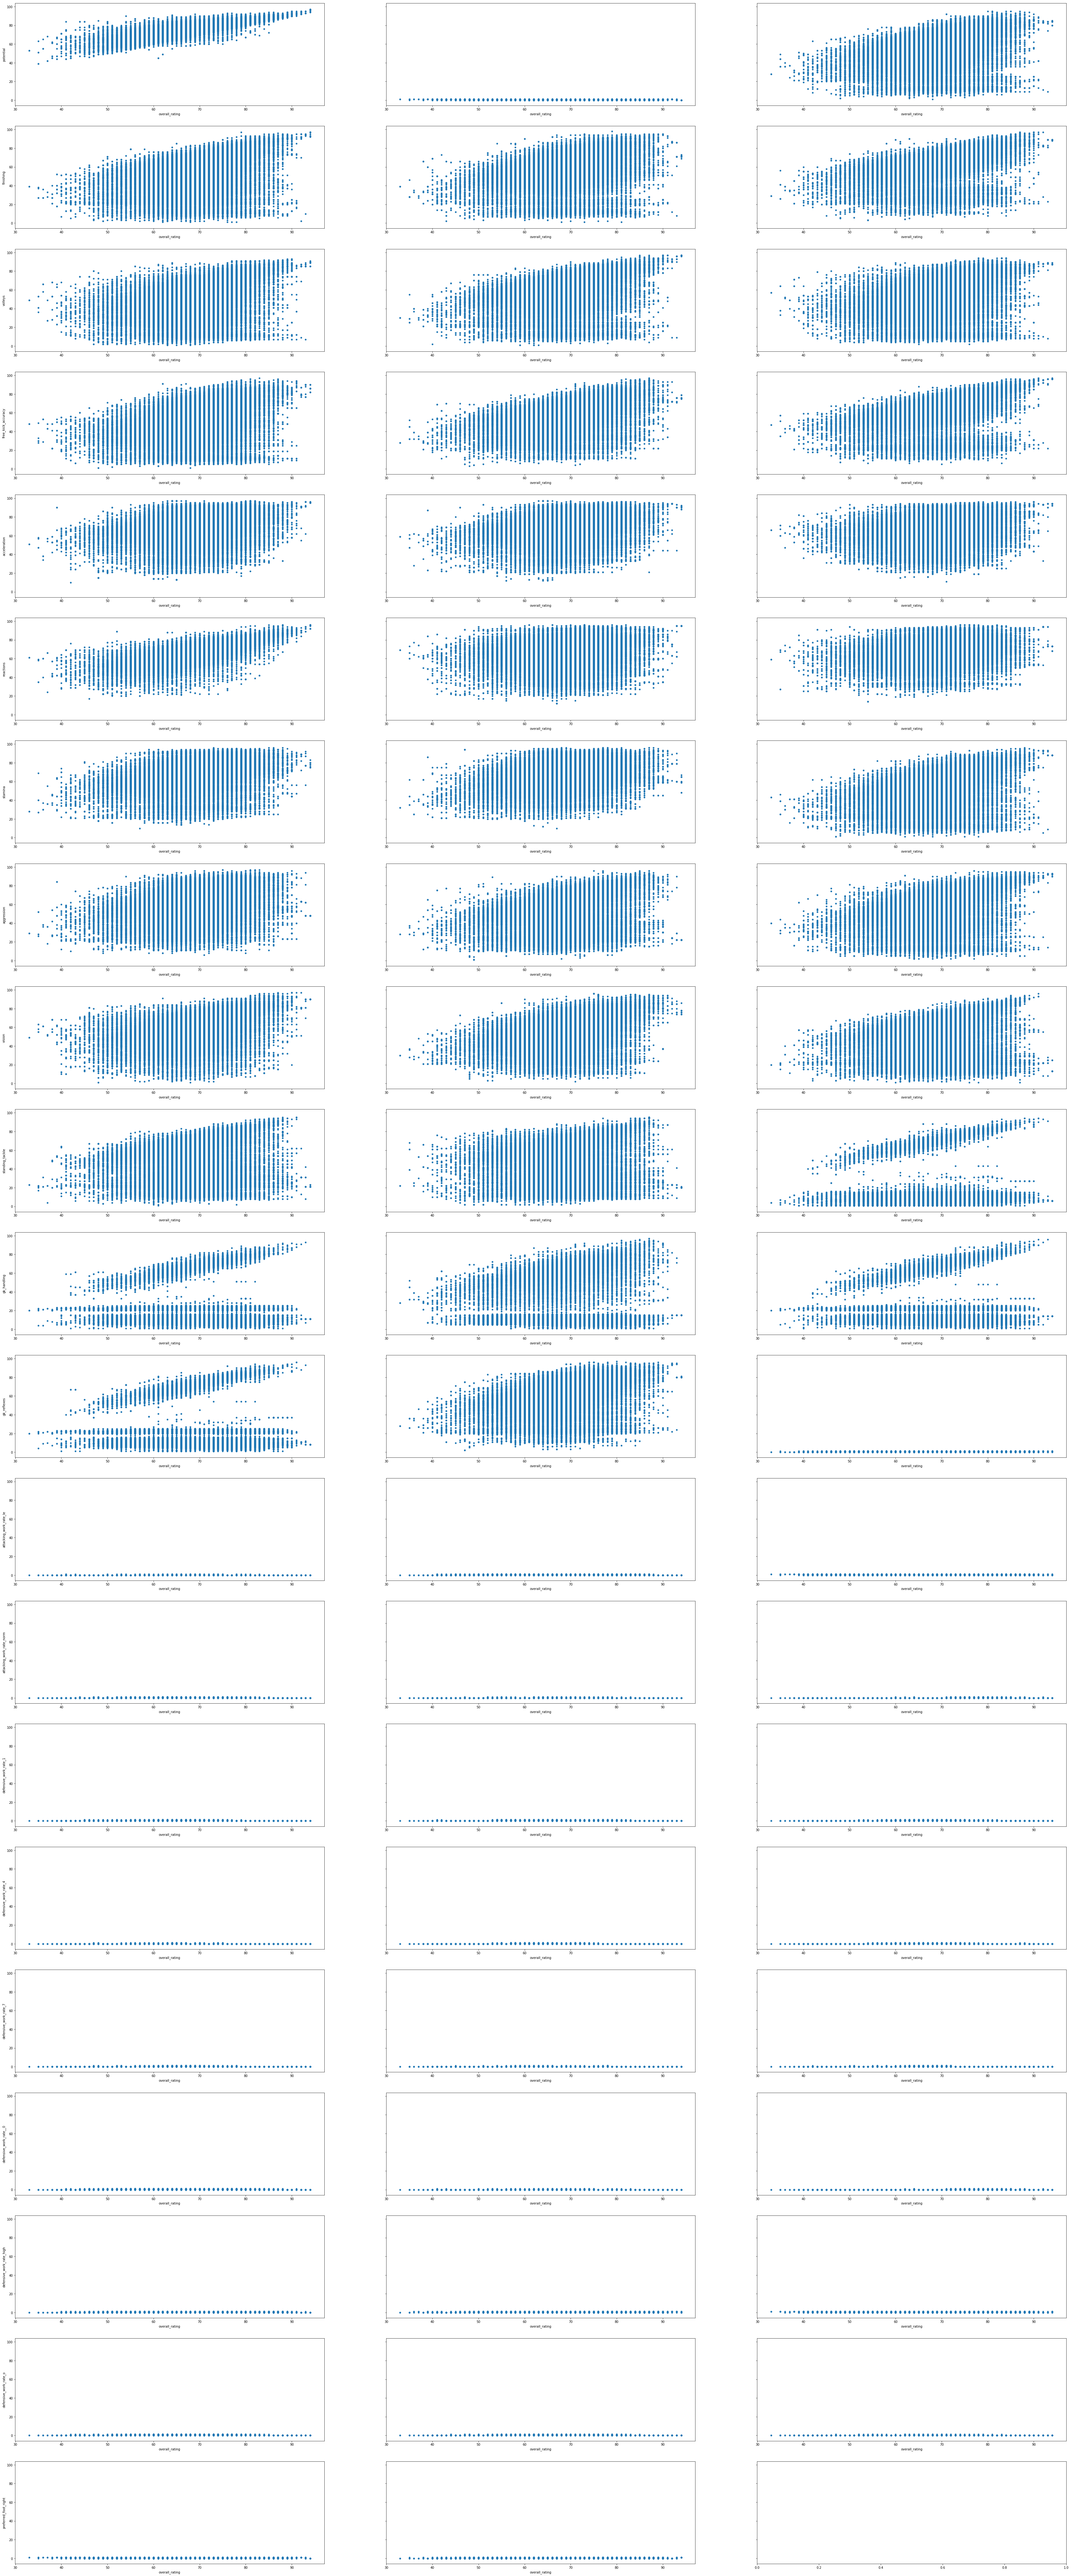

In [44]:
# Data Visualisation
fig, axs = plt.subplots(21, 3, sharey=True)
df.plot(kind='scatter', x='overall_rating', y='potential', ax=axs[0][0], figsize=(60, 150))
df.plot(kind='scatter', x='overall_rating', y='preferred_foot_right', ax=axs[0][1])
df.plot(kind='scatter', x='overall_rating', y='crossing', ax=axs[0][2])
df.plot(kind='scatter', x='overall_rating', y='finishing', ax=axs[1][0])
df.plot(kind='scatter', x='overall_rating', y='heading_accuracy', ax=axs[1][1])
df.plot(kind='scatter', x='overall_rating', y='short_passing', ax=axs[1][2])
df.plot(kind='scatter', x='overall_rating', y='volleys', ax=axs[2][0])
df.plot(kind='scatter', x='overall_rating', y='dribbling', ax=axs[2][1])
df.plot(kind='scatter', x='overall_rating', y='curve', ax=axs[2][2])
df.plot(kind='scatter', x='overall_rating', y='free_kick_accuracy', ax=axs[3][0])
df.plot(kind='scatter', x='overall_rating', y='long_passing', ax=axs[3][1])
df.plot(kind='scatter', x='overall_rating', y='ball_control', ax=axs[3][2])
df.plot(kind='scatter', x='overall_rating', y='acceleration', ax=axs[4][0])
df.plot(kind='scatter', x='overall_rating', y='sprint_speed', ax=axs[4][1])
df.plot(kind='scatter', x='overall_rating', y='agility', ax=axs[4][2])
df.plot(kind='scatter', x='overall_rating', y='reactions', ax=axs[5][0])
df.plot(kind='scatter', x='overall_rating', y='balance', ax=axs[5][1])
df.plot(kind='scatter', x='overall_rating', y='jumping', ax=axs[5][2])
df.plot(kind='scatter', x='overall_rating', y='stamina', ax=axs[6][0])
df.plot(kind='scatter', x='overall_rating', y='strength', ax=axs[6][1])
df.plot(kind='scatter', x='overall_rating', y='long_shots', ax=axs[6][2])
df.plot(kind='scatter', x='overall_rating', y='aggression', ax=axs[7][0])
df.plot(kind='scatter', x='overall_rating', y='interceptions', ax=axs[7][1])
df.plot(kind='scatter', x='overall_rating', y='positioning', ax=axs[7][2])
df.plot(kind='scatter', x='overall_rating', y='vision', ax=axs[8][0])
df.plot(kind='scatter', x='overall_rating', y='penalties', ax=axs[8][1])
df.plot(kind='scatter', x='overall_rating', y='marking', ax=axs[8][2])
df.plot(kind='scatter', x='overall_rating', y='standing_tackle', ax=axs[9][0])
df.plot(kind='scatter', x='overall_rating', y='sliding_tackle', ax=axs[9][1])
df.plot(kind='scatter', x='overall_rating', y='gk_diving', ax=axs[9][2])
df.plot(kind='scatter', x='overall_rating', y='gk_handling', ax=axs[10][0])
df.plot(kind='scatter', x='overall_rating', y='gk_kicking', ax=axs[10][1])
df.plot(kind='scatter', x='overall_rating', y='gk_positioning', ax=axs[10][2])
df.plot(kind='scatter', x='overall_rating', y='gk_reflexes', ax=axs[11][0])
df.plot(kind='scatter', x='overall_rating', y='shot_power', ax=axs[11][1])
df.plot(kind='scatter', x='overall_rating', y='attacking_work_rate_high', ax=axs[11][2])
df.plot(kind='scatter', x='overall_rating', y='attacking_work_rate_le', ax=axs[12][0])
df.plot(kind='scatter', x='overall_rating', y='attacking_work_rate_low', ax=axs[12][1])
df.plot(kind='scatter', x='overall_rating', y='attacking_work_rate_medium', ax=axs[12][2])
df.plot(kind='scatter', x='overall_rating', y='attacking_work_rate_norm', ax=axs[13][0])
df.plot(kind='scatter', x='overall_rating', y='attacking_work_rate_stoc', ax=axs[13][1])
df.plot(kind='scatter', x='overall_rating', y='attacking_work_rate_y', ax=axs[13][2])
df.plot(kind='scatter', x='overall_rating', y='defensive_work_rate_1', ax=axs[14][0])
df.plot(kind='scatter', x='overall_rating', y='defensive_work_rate_2', ax=axs[14][1])
df.plot(kind='scatter', x='overall_rating', y='defensive_work_rate_3', ax=axs[14][2])
df.plot(kind='scatter', x='overall_rating', y='defensive_work_rate_4', ax=axs[15][0])
df.plot(kind='scatter', x='overall_rating', y='defensive_work_rate_5', ax=axs[15][1])
df.plot(kind='scatter', x='overall_rating', y='defensive_work_rate_6', ax=axs[15][2])
df.plot(kind='scatter', x='overall_rating', y='defensive_work_rate_7', ax=axs[16][0])
df.plot(kind='scatter', x='overall_rating', y='defensive_work_rate_8', ax=axs[16][1])
df.plot(kind='scatter', x='overall_rating', y='defensive_work_rate_9', ax=axs[16][2])
df.plot(kind='scatter', x='overall_rating', y='defensive_work_rate__0', ax=axs[17][0])
df.plot(kind='scatter', x='overall_rating', y='defensive_work_rate_ean', ax=axs[17][1])
df.plot(kind='scatter', x='overall_rating', y='defensive_work_rate_es', ax=axs[17][2])
df.plot(kind='scatter', x='overall_rating', y='defensive_work_rate_high', ax=axs[18][0])
df.plot(kind='scatter', x='overall_rating', y='defensive_work_rate_low', ax=axs[18][1])
df.plot(kind='scatter', x='overall_rating', y='defensive_work_rate_medium', ax=axs[18][2])
df.plot(kind='scatter', x='overall_rating', y='defensive_work_rate_o', ax=axs[19][0])
df.plot(kind='scatter', x='overall_rating', y='defensive_work_rate_ormal', ax=axs[19][1])
df.plot(kind='scatter', x='overall_rating', y='defensive_work_rate_tocky', ax=axs[19][2])
df.plot(kind='scatter', x='overall_rating', y='preferred_foot_right', ax=axs[20][0])
df.plot(kind='scatter', x='overall_rating', y='preferred_foot_left', ax=axs[20][1])

In [45]:
df.columns

Index(['overall_rating', 'potential', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'attacking_work_rate_high', 'attacking_work_rate_le',
       'attacking_work_rate_low', 'attacking_work_rate_medium',
       'attacking_work_rate_norm', 'attacking_work_rate_stoc',
       'attacking_work_rate_y', 'defensive_work_rate_1',
       'defensive_work_rate_2', 'defensive_work_rate_3',
       'defensive_work_rate_4', 'defensive_work_rate_5',
       'defensive_work_rate_6', 'defensive_work_rate_7',
       'defensive_work_rate

In [47]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
df_new = ['potential', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'attacking_work_rate_high', 'attacking_work_rate_le',
       'attacking_work_rate_low', 'attacking_work_rate_medium',
       'attacking_work_rate_norm', 'attacking_work_rate_stoc',
       'attacking_work_rate_y', 'defensive_work_rate_1',
       'defensive_work_rate_2', 'defensive_work_rate_3',
       'defensive_work_rate_4', 'defensive_work_rate_5',
       'defensive_work_rate_6', 'defensive_work_rate_7',
       'defensive_work_rate_8', 'defensive_work_rate_9',
       'defensive_work_rate__0', 'defensive_work_rate_ean',
       'defensive_work_rate_es', 'defensive_work_rate_high',
       'defensive_work_rate_low', 'defensive_work_rate_medium',
       'defensive_work_rate_o', 'defensive_work_rate_ormal',
       'defensive_work_rate_tocky', 'preferred_foot_right','preferred_foot_left']
df_new2 = df[df_new]
new_y = df['overall_rating']

lm.fit(df_new2, new_y)
print(lm.coef_)
print(lm.intercept_)
print(lm.score(df_new2,new_y))
#print(lm.summary)

[ 3.77059829e-01  2.25952914e-02  1.19351580e-02  6.88129908e-02
  5.15594629e-02  2.24908131e-03 -1.02573318e-02  1.14278721e-02
  1.36905267e-02  6.48421797e-03  1.33399121e-01  5.52663899e-03
  1.12996565e-02 -8.68253969e-03  2.06351354e-01  6.78723843e-03
  1.63197296e-02  1.57401383e-02 -2.90656302e-03  5.92166589e-02
 -1.29720402e-02  1.94822450e-02  1.24124837e-02 -8.01202945e-03
 -2.64466975e-03  1.31338481e-02  3.24888910e-02  4.74099853e-03
 -2.84464485e-02  1.67955288e-01  3.29503465e-02 -3.32504207e-02
  5.68373137e-02  2.44222459e-02  3.12921753e-01 -6.34923330e+00
  1.54824776e+00  2.21318875e-01  1.82429541e+00 -6.15228653e-01
 -3.75947588e+00  4.69178540e-01 -3.66965761e-01  4.85870059e-01
 -5.47767236e-01 -3.09181575e-01  1.20702703e-01  6.46647622e-01
  8.43315725e-01  4.76661100e-01 -5.61010058e-01  5.48415476e+00
  3.73592292e+00  3.28419251e-02  4.44178053e-01 -2.30197011e-01
  5.73597900e-02 -1.83974630e+00 -6.15228653e-01  5.98976283e-05
 -5.98976280e-05]
-3.6791

In [48]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='overall_rating ~ potential+crossing+finishing+heading_accuracy+short_passing+volleys\
         +dribbling+curve+free_kick_accuracy+long_passing+ball_control+acceleration+sprint_speed+agility\
         +reactions+balance+shot_power+jumping+stamina+strength+long_shots+aggression+interceptions+positioning\
         +vision+penalties+marking+standing_tackle+sliding_tackle+gk_diving+gk_handling+gk_kicking+gk_positioning\
         +gk_reflexes+attacking_work_rate_high+attacking_work_rate_le+attacking_work_rate_low+attacking_work_rate_medium\
         +attacking_work_rate_norm+attacking_work_rate_stoc+attacking_work_rate_y+defensive_work_rate_1\
         +defensive_work_rate_2+defensive_work_rate_3+defensive_work_rate_4+defensive_work_rate_5+defensive_work_rate_6\
         +defensive_work_rate_7+defensive_work_rate_8+defensive_work_rate_9+defensive_work_rate__0\
         +defensive_work_rate_ean+defensive_work_rate_es+defensive_work_rate_high+defensive_work_rate_low\
         +defensive_work_rate_medium+defensive_work_rate_o+defensive_work_rate_ormal+defensive_work_rate_tocky\
         +preferred_foot_right+preferred_foot_left',data=df).fit()
print(lm.conf_int())
print(lm.summary())

                                   0         1
Intercept                  -2.739906 -2.165658
potential                   0.374226  0.379894
crossing                    0.020957  0.024233
finishing                   0.010156  0.013715
heading_accuracy            0.067228  0.070398
short_passing               0.048897  0.054222
volleys                     0.000658  0.003840
dribbling                  -0.012513 -0.008002
curve                       0.009876  0.012980
free_kick_accuracy          0.012316  0.015065
long_passing                0.004667  0.008302
ball_control                0.130334  0.136464
acceleration                0.002847  0.008207
sprint_speed                0.008756  0.013844
agility                    -0.010655 -0.006710
reactions                   0.204252  0.208450
balance                     0.005262  0.008313
shot_power                  0.014620  0.018019
jumping                     0.014318  0.017163
stamina                    -0.004509 -0.001304
strength     

#### Model Evaluation using a validation set

In [49]:
y = df['overall_rating']
x = df.drop(['overall_rating'], axis=1)

In [50]:
#evaluate the model  by spliting into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [51]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((128199, 61), (54943, 61), (128199,), (54943,))

In [52]:
model2 = LinearRegression()
model2.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
#predict class labels for the test set
predicted = model2.predict(x_test)
predicted

array([74.60663865, 52.17614341, 80.92024212, ..., 73.89922724,
       70.71023893, 69.67020058])

In [54]:
model2.score(x_test,y_test)

0.8429083123335542

84.29% Accuracy

#### Model Evaluation Using Cross-Validation

In [55]:
#evaluate the model using 10-fold cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(), x, y, cv=10)
scores, scores.mean()

(array([0.8487039 , 0.84344208, 0.83602098, 0.83913371, 0.84384047,
        0.840643  , 0.85003238, 0.83501933, 0.84376912, 0.84633602]),
 0.8426940991015293)

84.26 % Accuracy

In all Model Evaluation, accuracy is around 84% which means data is neither overfit and accuracy seems decent.